In [3]:
! pip install inference

In [2]:
! pip install Roboflow

In [242]:
from inference_sdk import InferenceHTTPClient
from inference import get_model
import supervision as sv
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import textwrap

In [206]:
# initialize the client
CLIENT = InferenceHTTPClient(
    api_url="http://detect.roboflow.com",
    api_key="JVuvSUZ2T8BQEtoGVvtv"
)
# infer on a local image
result = CLIENT.infer("/Users/sarancibia/code/sarabarancibiag/Images-MOJI/images/GinNoChimera/015.jpg", model_id="manga-text-detection/2")

In [278]:
path_img = "/Users/sarancibia/code/sarabarancibiag/Images-MOJI/images/GinNoChimera/015.jpg"
img = cv.imread("/Users/sarancibia/code/sarabarancibiag/Images-MOJI/images/GinNoChimera/015.jpg")
img_trials = img.copy()
img_trials_two = img.copy()
img_trials_three = img.copy()

In [95]:
from xml.etree import ElementTree as ET
import os

PATH = "/Users/sarancibia/Downloads/Manga109s_released_2023_12_07/annotations"

tree = ET.parse(os.path.join(PATH, 'GinNoChimera-es.xml'))
root = tree.getroot()

data = []

for i, pages in enumerate(root[1]):

    page = {}
    page['page'] = i

    bubbles = []

    for elem in pages:

        if elem.tag == 'text':

            info = elem.attrib
            info['text'] = elem.text

            bubbles.append(info)

    page['bubbles'] = bubbles

    data.append(page)

In [280]:
data

[{'page': 0, 'bubbles': []},
 {'page': 1,
  'bubbles': [{'id': '0001b31b',
    'xmin': '622',
    'ymin': '614',
    'xmax': '701',
    'ymax': '703',
    'translated_text': 'Habilidades especiales son cocinar y tareas domésticas en general.',
    'text': '特技は料理および家事全般'},
   {'id': '0001b31c',
    'xmin': '612',
    'ymin': '149',
    'xmax': '670',
    'ymax': '223',
    'translated_text': '1er año clase A Ryusei Tsugi',
    'text': '1年A組\u3000杠\u3000龍星\u3000'},
   {'id': '0001b31d',
    'xmin': '670',
    'ymin': '289',
    'xmax': '727',
    'ymax': '380',
    'translated_text': 'Altura 175 cm Peso 58 kg',
    'text': '身長175cm\u3000体重58kg'},
   {'id': '0001b31f',
    'xmin': '585',
    'ymin': '422',
    'xmax': '661',
    'ymax': '552',
    'translated_text': 'Sus calificaciones son excelentes y es bueno en los deportes.',
    'text': '成績はトップクラスでスポーツ万能'},
   {'id': '0001b320',
    'xmin': '206',
    'ymin': '476',
    'xmax': '283',
    'ymax': '590',
    'translated_text': 'Pero u

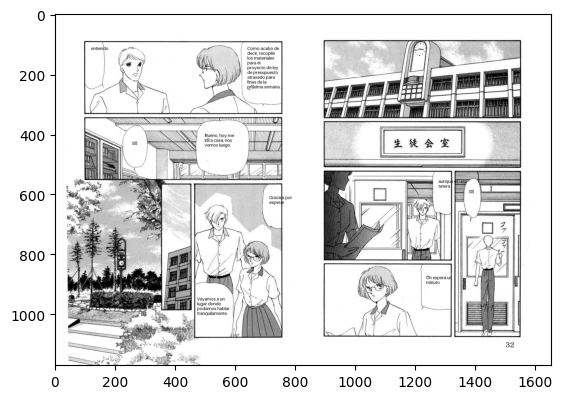

In [282]:
img_pil_two = Image.fromarray(img_trials_two)
draw = ImageDraw.Draw(img_pil_two)

#Se obtiene el numero de página
image_name = os.path.basename(path_img)
page_number = int(image_name.split('.')[0])
page_data = data[page_number]

#Se hace loop sobre ese numero de pagina en data

for bubble in page_data['bubbles']:
    x1 = round(float(bubble['xmin']))
    y1 = round(float(bubble['ymin']))
    x2 = round(float(bubble['xmax']))
    y2 = round(float(bubble['ymax']))

    draw.rounded_rectangle([x1, y1, x2, y2], fill='white', radius=20 )

    font = ImageFont.load_default()
    spacing = 1
    translated_text = bubble['translated_text']

    wrapped_text = textwrap.fill(translated_text, width=15)

    draw.multiline_text([x1, y1, x2, y2], wrapped_text, fill="black", spacing=spacing, align="left",font_size=15)

plt.imshow(img_pil_two)

img_pil_two.save('imagen_guardada.png')